<a href="https://colab.research.google.com/github/00150/Practice-anything..../blob/main/%EA%B8%8D%EC%A0%95%2C_%EB%B3%B4%ED%86%B5_%2C%EB%B6%80%EC%A0%95_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8(%EB%A6%AC%EB%B7%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 리뷰데이터 : 감성 분류 & 긍정 / 부정 키워드 분석


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 사용할 라이브러리 생성.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# 데이터 불러오기.
url = '/content/drive/MyDrive/project3  file./train_df_token.csv'

train_df = pd.read_csv(url)

# 컬럼 : 'Unnamed: 0' 을 제거합니다.
train_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
train_df.head(2)

,리뷰텍스트,label
0,정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?,3.0
1,몇 짐을 돌아오신건지 자장떡을 먹다 맘 ㅠㅠ,3.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11845 entries, 0 to 11844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   리뷰텍스트   11845 non-null  object 
 1   label   11791 non-null  float64
dtypes: float64(1), object(1)
memory usage: 185.2+ KB


In [6]:
# 결측값이 존재하는 행만 추출합니다. 
train_df[train_df['label'].isnull()]

,리뷰텍스트,label
92,"너무 맛있었어요😊 여자친구가 비건 카페를 좋아한다고해서 같이 갔는 데, 비건카페라...",NaN
197,조용하고 뷰도 좋고 가성비 좋은 음식점,NaN
400,1. 입장하면 음료교환권 주는데 추가금은 별도 계산해야합니다. 2. 모닥불이 두 곳...,NaN
747,친절하고 맛있고,NaN
788,코로나로 진짜 오랫만에 갔는데 깔끔해져서 좋아요 ㅎㅎ,NaN
1051,친절해여 커피가 맛있어요 !!,NaN
1128,두딸과 함께 팬케이크 2개짜리를 2번 먹었어요. 달지않고 깔끔한 맛입니다.,NaN
1223,아직 크리스마스 에디션은 많이 없는거 같아요 ㅎㅎ 그래도 예뻤구 케이크 짱 기대됩니...,NaN
1430,친구들하고 내기볼링하러 갔는데 시설도 깔끔하고 분위기도 엄청 좋았어요 직원분들도 친...,NaN
1620,"별내에 칼국수 맛집이 흔하지 않는데, 시원한 멸치국수 맛이 최고여서 자주 이용합니다...",NaN


In [7]:
# 결측값이 존재하는 컬럼 : label에 값을 채워넣습니다. 
train_df.at[92,'label'] = 1
train_df.at[197,'label'] = 1
train_df.at[400,'label'] = 2
train_df.at[747,'label'] = 1
train_df.at[788,'label'] = 1
train_df.at[1051,'label'] = 1
train_df.at[1128,'label'] = 1
train_df.at[1223,'label'] = 1
train_df.at[1430,'label'] = 1
train_df.at[1620,'label'] = 1


train_df.at[1649,'label'] = 1
train_df.at[1900,'label'] = 1
train_df.at[1901,'label'] = 1
train_df.at[1902,'label'] = 1
train_df.at[2046,'label'] = 1


train_df.at[2242,'label'] = 1
train_df.at[2243,'label'] = 1
train_df.at[2244,'label'] = 1
train_df.at[2245,'label'] = 1
train_df.at[2417,'label'] = 1

train_df.at[2420,'label'] = 1
train_df.at[2579,'label'] = 1
train_df.at[2664,'label'] = 1
train_df.at[2969,'label'] = 1
train_df.at[3166,'label'] = 1

train_df.at[3237,'label'] = 1
train_df.at[3498,'label'] = 1
train_df.at[3710,'label'] = 1
train_df.at[3821,'label'] = 1
train_df.at[4017,'label'] = 3

train_df.at[4131,'label'] =1
train_df.at[4144,'label'] =1
train_df.at[4148,'label'] =1
train_df.at[4173,'label'] =1

train_df.at[4223,'label'] = 1
train_df.at[4940,'label'] = 1
train_df.at[5180,'label'] = 1
train_df.at[5284,'label'] = 1
train_df.at[5888,'label'] = 1

train_df.at[5890,'label'] = 1
train_df.at[5949,'label'] = 1
train_df.at[6071,'label'] = 1
train_df.at[6091,'label'] = 1
train_df.at[6220,'label'] = 1


train_df.at[6379,'label'] = 1
train_df.at[6510,'label'] = 1
train_df.at[6536,'label'] = 1
train_df.at[6617,'label'] = 1
train_df.at[6657,'label'] = 1

train_df.at[8874,'label'] = 1
train_df.at[9226,'label'] = 1
train_df.at[9635,'label'] = 1
train_df.at[9661,'label'] = 1
train_df.at[9888,'label'] = 1 

In [8]:
# 행의 결측값을 다시 한 번 확인합니다.
train_df['label'].isnull().sum()

0

In [9]:
# 타겟의 범주가 어떤 비율을 가지고 있는지 확인하기.
train_tg = train_df['label']
train_tg.value_counts(normalize=True)

1.0     0.882989
2.0     0.066442
3.0     0.049979
11.0    0.000507
33.0    0.000084
Name: label, dtype: float64

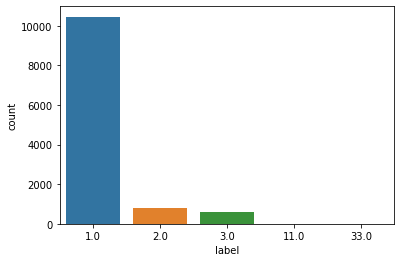

In [10]:
# 타겟 범주 비율을 시각화 합니다.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=train_tg);

In [11]:
# 11 및 3으로 잘못 표기된 값들을 고쳐줍니다. 11 ->1, 33 -> 3

# 먼저 11로 작성된 데이터의 행의 위치를 살펴봅니다.
train_df[train_df['label'] == 11]

# 이후 텍스트를 확인하여 값을 변경해줍니다.
train_df.at[85,'label'] = 1
train_df.at[298,'label'] = 1 
train_df.at[3820,'label'] = 1 
train_df.at[8345,'label'] = 1
train_df.at[9102,'label'] = 1  
train_df.at[9866,'label'] = 1

# 마지막으로 11로 작성된 데이터의 행의 위치를 살펴봅니다.
train_df[train_df['label'] == 33]

# 이후 텍스트를 확인하여 값을 변경해줍니다.
train_df.at[8304,'label'] = 3

In [12]:
train_df[train_df['label'] == 33]

,리뷰텍스트,label


In [13]:
# 다시 한 번 값의 범주 비율을 확인합니다.
train_tg = train_df['label']
train_tg.value_counts(normalize=True)

1.0    0.883495
2.0    0.066442
3.0    0.050063
Name: label, dtype: float64

#### 클래스 불균형.
> 1의 값은 만족을 나타내고, 2는 보통, 3은 부정을 나타냅니다.

* 만족을 나타내는 값이 너무 많습니다, 추후 모델이 긍정만을 예측하는 경우가 생깁니다 <br/>

* 긍정리뷰를 잘 예측할 수 있으나, 부통과 부정에 관하여는 정확도가 매우 낮을 수 있습니다.



#### 데이터 전처리 

In [14]:
# 데이터 전처리

# 컬럼: 리뷰텍스트 구간에서 중복된 리뷰가 존재했습니다. 열을 지정하여 중복을 제거합니다.
train_df.drop_duplicates(['리뷰텍스트'], inplace=True)

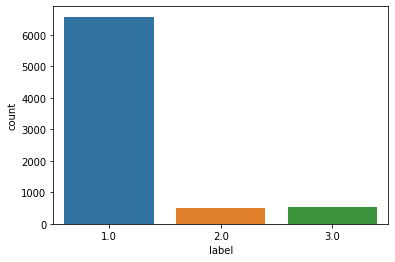

In [15]:
# 타겟 범주 비율을 시각화 합니다.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=train_df['label']);

In [16]:
train_df['label'].value_counts()

1.0    6570
3.0     528
2.0     498
Name: label, dtype: int64

In [17]:
#긍정, 보통 및 불만족에 대한 데이터의 개수는 가장 낮은 보통을 나타내는 데이터의 개수를 기준으로 합니다.

# 개수를 일치하고, 각 값이 속한 인덱스 번호를 추출합니다.
positive_random_idx = train_df[train_df['label'] == 1].sample(498, random_state= 10).index.tolist()
normal_random_idx = train_df[train_df['label'] == 2].sample(498, random_state = 10).index.tolist()
nagative_random_idx = train_df[train_df['label'] == 3].sample(498, random_state = 10).index.tolist()


# 위에서 생성한 각각의 인덱스 값을 모두 더합니다.
train_random_idx = positive_random_idx + normal_random_idx + nagative_random_idx


---
## test_data 작업



In [18]:
# 테스트를 진행할 데이터 또한 가져옵니다.
url = '/content/drive/MyDrive/project3  file./test_df_token.csv'
test_df = pd.read_csv(url)

# label 컬럼 생성
test_df['label'] = ""


# 리뷰텍스트의 "" 값 제거
test_df = test_df[test_df.리뷰텍스트 !=""]
test_df = test_df[test_df.리뷰텍스트 !='없음']
test_df = test_df.dropna()
# 컬럼 : 'Unnamed: 0' 제거.
test_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [19]:
test_df.shape

(2229, 2)

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 1 to 2505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰텍스트   2229 non-null   object
 1   label   2229 non-null   object
dtypes: object(2)
memory usage: 52.2+ KB


#### 테스트 데이터 또한 전처리 작업을 진행합니다.

In [21]:
# 데이터 전처리

# 컬럼: 리뷰텍스트 구간에서 중복된 리뷰가 존재했습니다. 열을 지정하여 중복을 제거합니다.
test_df.drop_duplicates(['리뷰텍스트'], inplace=True)
test_df.shape

(1212, 2)

## 모델을 만들기 위한 작업
> 각각의 리뷰 텍스트를 토근화합니다.<br>
❗ 한글 텍스트의 경우, Okt 형태소 분석기를 활용하였습니다.

In [22]:
# 필요한 패키지를 설치합니다.
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.9 MB/s 
     |████████████████████████████████| 453 kB 39.5 MB/s 


In [23]:
# 필요한 라이브러리를 가져옵니다.
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

#### 1. 각 리뷰에 대하여 토근화 진행
> 함수를 생성하여 진행하도록 하겠습니다.
이때 **불용어** 또한 같이 제거하도록 합니다. 